In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
from PIL import Image, ImageStat
import numpy as np
import glob

Mean [138.21019788904906, 134.32357455366594, 124.83051654787947]
Median [140, 136, 125]


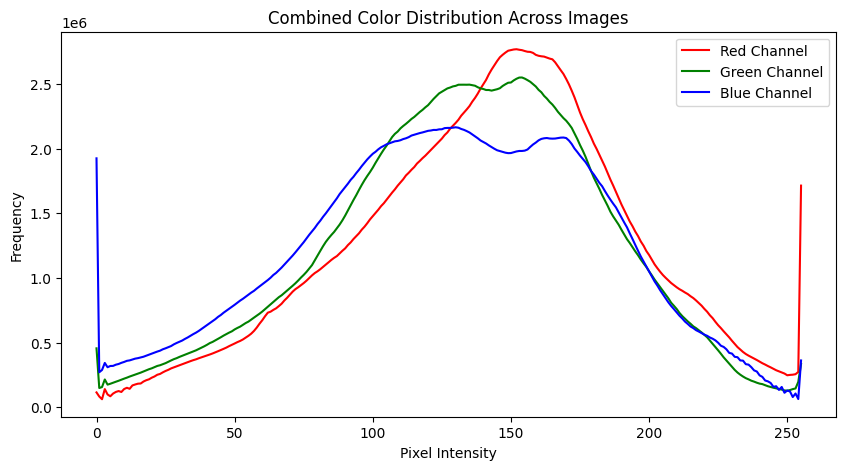

In [2]:
img = ImageStat.Image.open("/home/shared/Mammiferes/Castor/original (3).png")
#plt.imshow(img)

stats_img = ImageStat.Stat(img)
mean = stats_img.mean
print("Mean", mean)
median = stats_img.median
print("Median", median)

# Path to folder with images (use a wildcard to match multiple images)
image_paths = glob.glob("/home/shared/Mammiferes/**/*.jpg", recursive=True)

# Initialize accumulators for each color channel
r_hist_total = np.zeros(256)
g_hist_total = np.zeros(256)
b_hist_total = np.zeros(256)

i = 0
mean_stats = []

# Iterate over all images
for image_path in image_paths:
    i = i + 1
    image = Image.open(image_path).convert("RGB")  # Ensure RGB format
    r, g, b = image.split()  # Split into channels

    # Calculate histograms and add them to the accumulators
    r_hist_total += np.array(r.histogram())
    g_hist_total += np.array(g.histogram())
    b_hist_total += np.array(b.histogram())

    img_stats = ImageStat.Stat(image)
    mean_stats += img_stats.mean
    

# Plot combined histograms for all images
plt.figure(figsize=(10, 5))
plt.plot(r_hist_total, color="red", label="Red Channel")
plt.plot(g_hist_total, color="green", label="Green Channel")
plt.plot(b_hist_total, color="blue", label="Blue Channel")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Combined Color Distribution Across Images")
plt.legend()
plt.show()
